# Машинное обучение, DS-поток, осень 2024
## Задание ML.12


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Баллы за задание**  
Задача 1 &mdash; **100 баллов**  
Задача 2 &mdash; **80 баллов**  

Всего &mdash; **180 баллов**  

In [1]:
!pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.2 MB/s eta 0:00:0000:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=9c0aa1df635d29edf91ffd0dc371bb053cbe62acc9b277604b39119763cbc6ca
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=86134d3a5f0c504b8cf7561b6f9152a6c28a8d7cb724865869ab075c08c99891
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-py

In [2]:
# Утилиты стандартной библиотеки
from functools import lru_cache
import os

# Библиотеки для анализа данных
import numpy as np

# Библиотеки для обработки изображений
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Библиотеки для обучения
import pytorch_lightning as pl
import albumentations as A

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
import copy
from functools import lru_cache
import os
import random
import shutil
from tqdm import tqdm
from urllib.request import urlretrieve

# Библиотеки для анализа данных
import numpy as np
import sklearn.preprocessing
from tqdm.auto import tqdm

# Библиотеки для обработки изображений
import cv2
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import torchvision.transforms as transforms

# Библиотеки для визуализации
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

import pytorch_lightning as pl
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import segmentation_models_pytorch as smp
import wandb
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import Callback, ModelCheckpoint

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
sns.set(style='darkgrid', palette='Set2')
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
# Bot check

# HW_ID: ds_ml12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

### Данные

Мы предлагаем вам поработать с подмножеством датасета [Carvana](https://www.kaggle.com/c/carvana-image-masking-challenge) с Kaggle. Carvana &mdash; это онлайн магазин подержаннных aвтомобилей. Компания организовала соревнование для того, чтобы получить модель, с помощью которой получилось бы автоматически сегментировать авто на фотографии. Затем, используя маску для автомобиля, его можно было использовать для получения более интересных фотографий с автомобилем.


Мы не будем использовать использовать датасет целиком, так как он очень большой, а для наших целей хватит небольшой его части.

Скачайте архив с даными [здесь](https://drive.google.com/file/d/1UbXOTP6GIp1pp-LwwpfX1p8m6iaWXzM1/view?usp=drive_link). Как работать со внешними данными на Google Colab или Kaggle описано в предыдущем домашнем задании.

In [6]:
# zip_path = ...
data_path = '/kaggle/input/carvana'
# zip_path_bash = str(zip_path).replace(' ', '\ ')

In [7]:
# !unzip $zip_path_bash -d $data_path

Данные уже разделены на трейн и тест. В папках `train` и `train_masks` лежат изображения автомобилей и их маски соответственно. Аналогично для папок `test` и `test_masks`.

In [8]:
!ls $data_path

test  test_masks  train  train_masks


Изображения и маски имеют одинаковое начало названия. Название файла маски отличается тем, что есть окончание `_mask`, а также сам файл имеет другой формат &mdash; gif вместо jpg. Так можно получить изображение и его маску из трейна.

In [9]:
coco_categories_segmentation = np.array([
    'car'
])

In [10]:
def plot_probs(probs):
    '''Визуализирует предсказания для 21 класса'''
    sns.set(font_scale=0.9)
    plt.figure(figsize=(10, 16))
    for i, name in enumerate(coco_categories_segmentation):
        plt.subplot(7, 3, i + 1)
        plt.imshow(probs[i], cmap='viridis')
        plt.title(name)
        plt.colorbar(fraction=0.03, pad=0.04)
        plt.axis('off')
    plt.tight_layout()

In [11]:
def outputs_to_probs(model_outputs, mode='softmax'):
    """
    Предсказания нужно отмасштабировать, чтобы получить ~ вероятности
    """
    assert mode in ('softmax', 'minmax')
    if mode == "softmax":
        category_probs = torch.softmax(model_outputs, dim=0).numpy()
    elif mode == 'minmax':
        category_preds = model_outputs.numpy()
        category_probs = sklearn.preprocessing.MinMaxScaler()\
                        .fit_transform(np.ravel(category_preds)[:, None])\
                        .reshape(category_preds.shape)
    else:
        raise NotImplementedError("This mode is not impleted. Use one of ('softmax', 'minmax').")
    return category_probs

In [12]:
DATA_PATH = data_path
img_name = "0cdf5b5d0ce1_04.jpg"
splitted = img_name.split('.')
mask_name = splitted[0] + "_mask" + ".gif"

img_path = os.path.join(DATA_PATH, "train", img_name)
mask_path = os.path.join(DATA_PATH, "train_masks", mask_name)

Визуализируем изображение и маску.

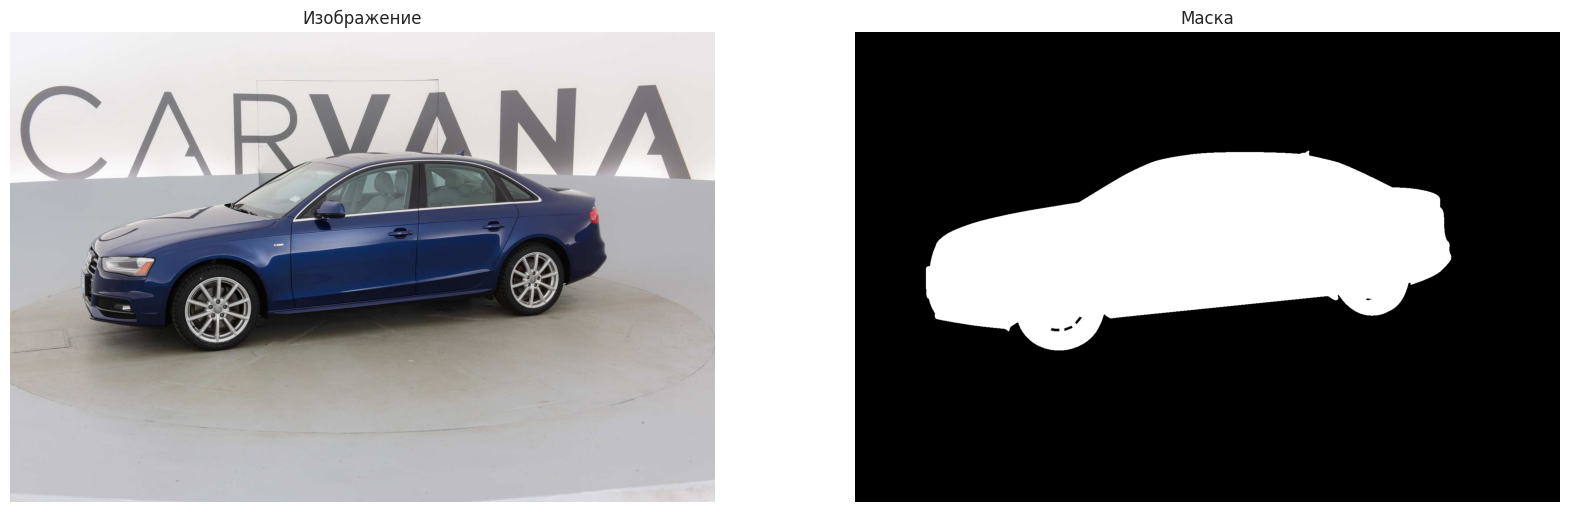

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Изображение")
plt.imshow(Image.open(img_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Маска")
plt.imshow(Image.open(mask_path))
plt.axis("off");

Исходные изображения довольно большие. Предлагаем вам работать с изображениями меньшего размера, а именно (160, 240) для уменьшения вычислительных затрат. Не забудьте сделать соответствующее преобразование.

In [14]:
Image.open(img_path).size

(1918, 1280)

### Задача 1. Простая сегментация
Вы построите свою собственную модель сегментации и проведете анализ ее работы.

#### 1. Обучение сегментации

Постройте модель типа U-Net. Вы можете использовать непосредственно первоначальную версию U-Net (рассматривали на лекции), либо ее модификацию, либо любую другую модель типа кодировщик-декодировщик с skip-connection конструкцией.

In [15]:
def preprocess_mask1(mask):
    '''Относит границу к животному'''
    mask = mask.astype('int')
    # mask[(mask == 2.0)] = 0.0
    # mask[(mask == 1.0) | (mask == 3.0)] = 1.0
    return mask

In [16]:
from PIL import Image
import numpy as np

def gif_to_numpy_array(gif_path):
    with Image.open(gif_path) as img:
        img = img.convert('L')
        numpy_array = np.array(img)
    return numpy_array

array = gif_to_numpy_array('/kaggle/input/carvana/test_masks/00087a6bd4dc_15_mask.gif')
                           

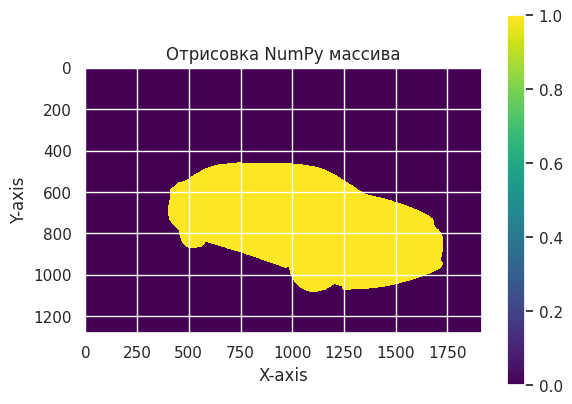

In [17]:
def plot_numpy_array(array):
    # if array.ndim != 2:
    #     raise ValueError("Функция поддерживает только двумерные массивы.")
    
    plt.imshow(array, cmap='viridis', interpolation='nearest')
    plt.colorbar()  # Добавляем цветовую шкалу
    plt.title('Отрисовка NumPy массива')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

random_array = array

plot_numpy_array(random_array.astype('bool').astype(int))


In [18]:
class OxfordPetDataset(Dataset):
    def __init__(self, images_filenames, images_directory, masks_directory,  transform=None):
        '''Задаем аугментации и пути к картинкам и маскам'''
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.masks_directory = masks_directory
        self.transform = transform

    def __len__(self):
        return len(self.images_filenames)

    # @lru_cache(maxsize=None)
    def _get_image_mask(self, image_filename):
        '''Получим картинку и маску для файла image_filename'''
        # Считываем изображение
        image = cv2.imread(os.path.join(self.images_directory, image_filename))
        # Упорядочиваем каналы в правильном порядке
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Считываем маску
        with Image.open(os.path.join(self.masks_directory, image_filename[:-4] + '_mask.gif')) as img:
            img = img.convert('L')
            numpy_array = np.array(img)
        mask = numpy_array.astype('bool').astype('int')
        return image, mask

    def __getitem__(self, idx):
        '''Получим картинку и маску индекса idx'''
        image_filename = self.images_filenames[idx]
        image, mask = self._get_image_mask(image_filename)

        # Применяем трансформацию (аугментацию), если это необходимо
        if self.transform is not None:
            transformed = self.transform(image=image, mask=mask)
            image = transformed["image"]
            mask = transformed["mask"]

        return image, mask

In [19]:
# os.path.join(masks_directory_val, val_images_filenames[5][:-4] + '_mask.gif')
# # val_images_filenames
# # '/kaggle/input/carvana/test_masks/00087a6bd4dc_15_mask.gif'

In [21]:

images_directory_train = '/kaggle/input/carvana/train'
masks_directory_train = '/kaggle/input/carvana/train_masks'

images_filenames = list(sorted(os.listdir(images_directory_train)))
correct_images_filenames_train = [
    i for i in images_filenames
    if cv2.imread(os.path.join(images_directory_train, i)) is not None
]

train_images_filenames = correct_images_filenames_train

images_directory_val = '/kaggle/input/carvana/test'
masks_directory_val = '/kaggle/input/carvana/test_masks'

images_filenames = list(sorted(os.listdir(images_directory_val)))
correct_images_filenames_val = [
    i for i in images_filenames
    if cv2.imread(os.path.join(images_directory_val, i)) is not None
]

val_images_filenames = correct_images_filenames_val

print(len(train_images_filenames), len(val_images_filenames))

4580 508


In [22]:
train_transform = A.Compose(
    [
        A.Resize(160, 256),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.GaussNoise(),
        ToTensorV2()
    ]
    # , is_check_shapes=False
)
val_transform = A.Compose([
    A.Resize(160, 256),
    ToTensorV2()
]
                          # , is_check_shapes=False
                         )


train_dataset = OxfordPetDataset(train_images_filenames, images_directory_train, masks_directory_train, transform=train_transform)
val_dataset = OxfordPetDataset(val_images_filenames, images_directory_val, masks_directory_val, transform=val_transform)

In [20]:
def visualize_augmentations(dataset, idx=0, samples=5):
    '''Визуализируем samples аугментаций для индекса idx из dataset'''
    # Делаем копию датасета для визуализации
    dataset = copy.deepcopy(dataset)

    # Убираем из аугментаций нормализацию и приведение к тензору, для удобства отображения результата
    dataset.transform = A.Compose([
        t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])

    figure, ax = plt.subplots(nrows=samples, ncols=2, figsize=(5, 13))
    for i in range(samples):
        image, mask = dataset[idx]
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")
        ax[i, 0].set_title("Augmented image")
        ax[i, 1].set_title("Augmented mask")
        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
    plt.tight_layout()
    plt.show()

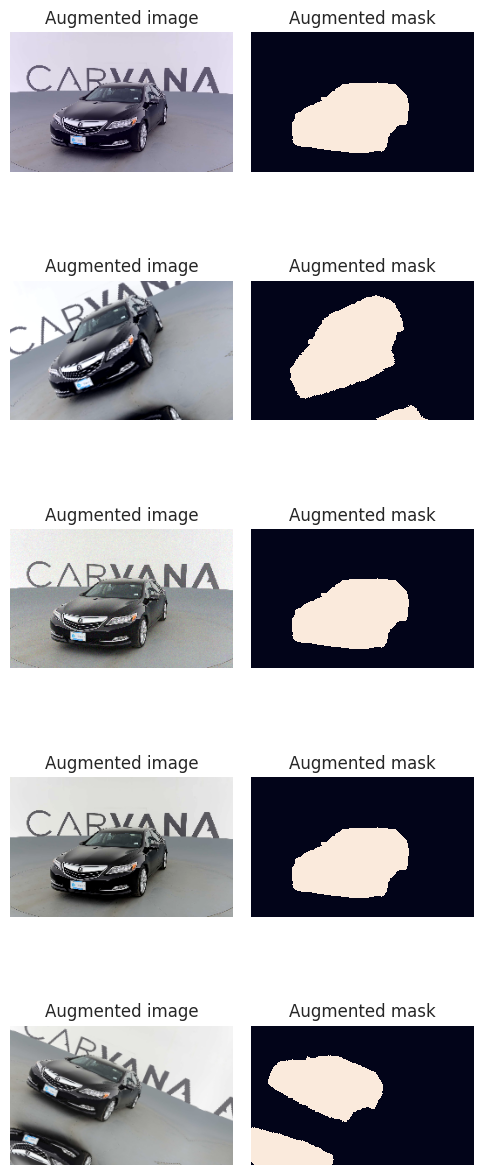

In [24]:
visualize_augmentations(train_dataset, idx=1)

In [25]:
train_dataset[0][1][80]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [26]:
batch_size = 32
num_workers = 0
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=True)

In [27]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("Images shape:", images.shape)
print("mask:", labels.shape)

Images shape: torch.Size([32, 3, 160, 256])
mask: torch.Size([32, 160, 256])


In [21]:
class SegmentationModel(pl.LightningModule):
    def __init__(self, lr=1e-4):
        '''Инициализация модели'''
        super().__init__()
        self.lr = lr
        self.criterion = nn.BCEWithLogitsLoss()
        self.save_hyperparameters()

        self.model = smp.Unet(encoder_name="resnet34", encoder_weights='imagenet',
                              in_channels=3, classes=2, activation=None)

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

    def forward_all_classes(self, x):
        '''Предсказание для всех 21 каналов'''
        return self.model(x.float())  # (BS, 21, H, W)

    def forward(self, x):
        '''Предсказание только для канала собаки'''
        return self.forward_all_classes(x)  # (BS, 21, H, W)

    def __step(self, batch):
        '''Возвращает лосс и предсказания с 1 шага обучения по батчу'''
        images, target = batch
        output = self.forward(images)
        output = output[:, 1].float()  # Предполагается, что канал собаки - это второй канал
        loss = self.criterion(output, target.float())
        return loss, output, target
    
    def calculate_iou(self, preds, targets, threshold=0.5):
        '''Вычисляет IoU для бинарной сегментации'''
        preds = (preds > threshold).float()  # Применяем порог для бинаризации
        intersection = (preds * targets).sum()
        union = preds.sum() + targets.sum() - intersection
        iou = intersection / (union + 1e-6)  # Добавляем малое значение для избежания деления на ноль
        return iou
    
    def training_step(self, batch, batch_idx):
        loss, preds, targets = self.__step(batch)
        iou = self.calculate_iou(preds, targets)
        
        # Логируем метрики
        self.log('train_loss', loss)
        self.log('train_iou', iou)
        
        return {'loss': loss}
    
    def validation_step(self, batch, batch_idx):
        with torch.no_grad():  # Отключаем вычисление градиентов
            loss, preds, targets = self.__step(batch)
            iou = self.calculate_iou(preds, targets)
    
            # Логируем метрики
            self.log('val_loss', loss)
            self.log('val_iou', iou)
    
        return {'val_loss': loss}


Обучите модель на тренировочной части данных. В качестве метрики качества используйте IoU. Визуализируйте изменение ошибки (loss) и метрики (IoU) на тренировочной и тестовой части данных.

In [35]:
model = SegmentationModel()
checkpoint_callback = pl.callbacks.ModelCheckpoint()
wandb_logger = WandbLogger(project='Unet', log_model='all')
trainer = pl.Trainer(logger=wandb_logger,
                     max_epochs=8,
                     accelerator="gpu",
                     callbacks=[checkpoint_callback])

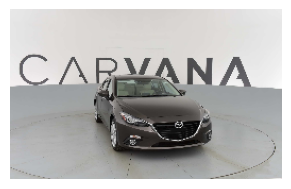

In [36]:
image, mask = val_dataset[6]
plt.figure(figsize=(3.5, 3.5))
plt.imshow(image.moveaxis(0, 2))
plt.axis('off');

In [37]:
# Получаем предсказания всех 21 классов, включая фон
with torch.no_grad():
    outputs = model.forward(image.unsqueeze(0)).cpu().squeeze()

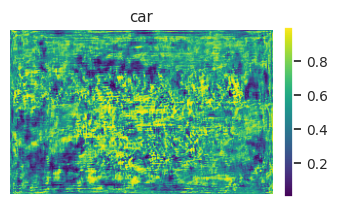

In [38]:
probs_sm = outputs_to_probs(outputs, mode='softmax')
plot_probs(probs_sm)

In [39]:
trainer.fit(model, train_loader, val_loader)

wandb: Currently logged in as: leonard88dranoel (leonard88dranoel-iitp). Use `wandb login --relogin` to force relogin


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [40]:
wandb.finish()

Как быстро обучается модель? Как вы думаете, с чем это связано?

**Ответ:** Модель учится намного дольше модели, которая решают задачу классификацию, в первую очередь это связано с тем, что нейронов намного больше, ведь для плотного предсказания, где 160*256 - размеры предсказаний нужно больше нейронов, из-за этого и увеличивается время обучения

#### 2. Анализ модели
Выберите 10 изображений из тестовой части данных и посчитайте качество модели на них. Теперь поменяйте фон для изображений. Можно, например, поменять его цвет. Проверьте качество модели на новых изображениях.

IoU для оригинальных изображений: [0.967801591731452, 0.9803847799997097, 0.9858357007478483, 0.9859190923260956, 0.9867920215490589, 0.9869864168442455, 0.9846174527427376, 0.9793421997653342, 0.9735332392640339, 0.9855977954314208]
IoU для измененных изображений: [0.42889404296875, 0.404052734375, 0.39105224609375, 0.41065673828125, 0.38365478515625, 0.3940185546875, 0.3989013671875, 0.38582763671875, 0.30447998046875, 0.38314208984375]


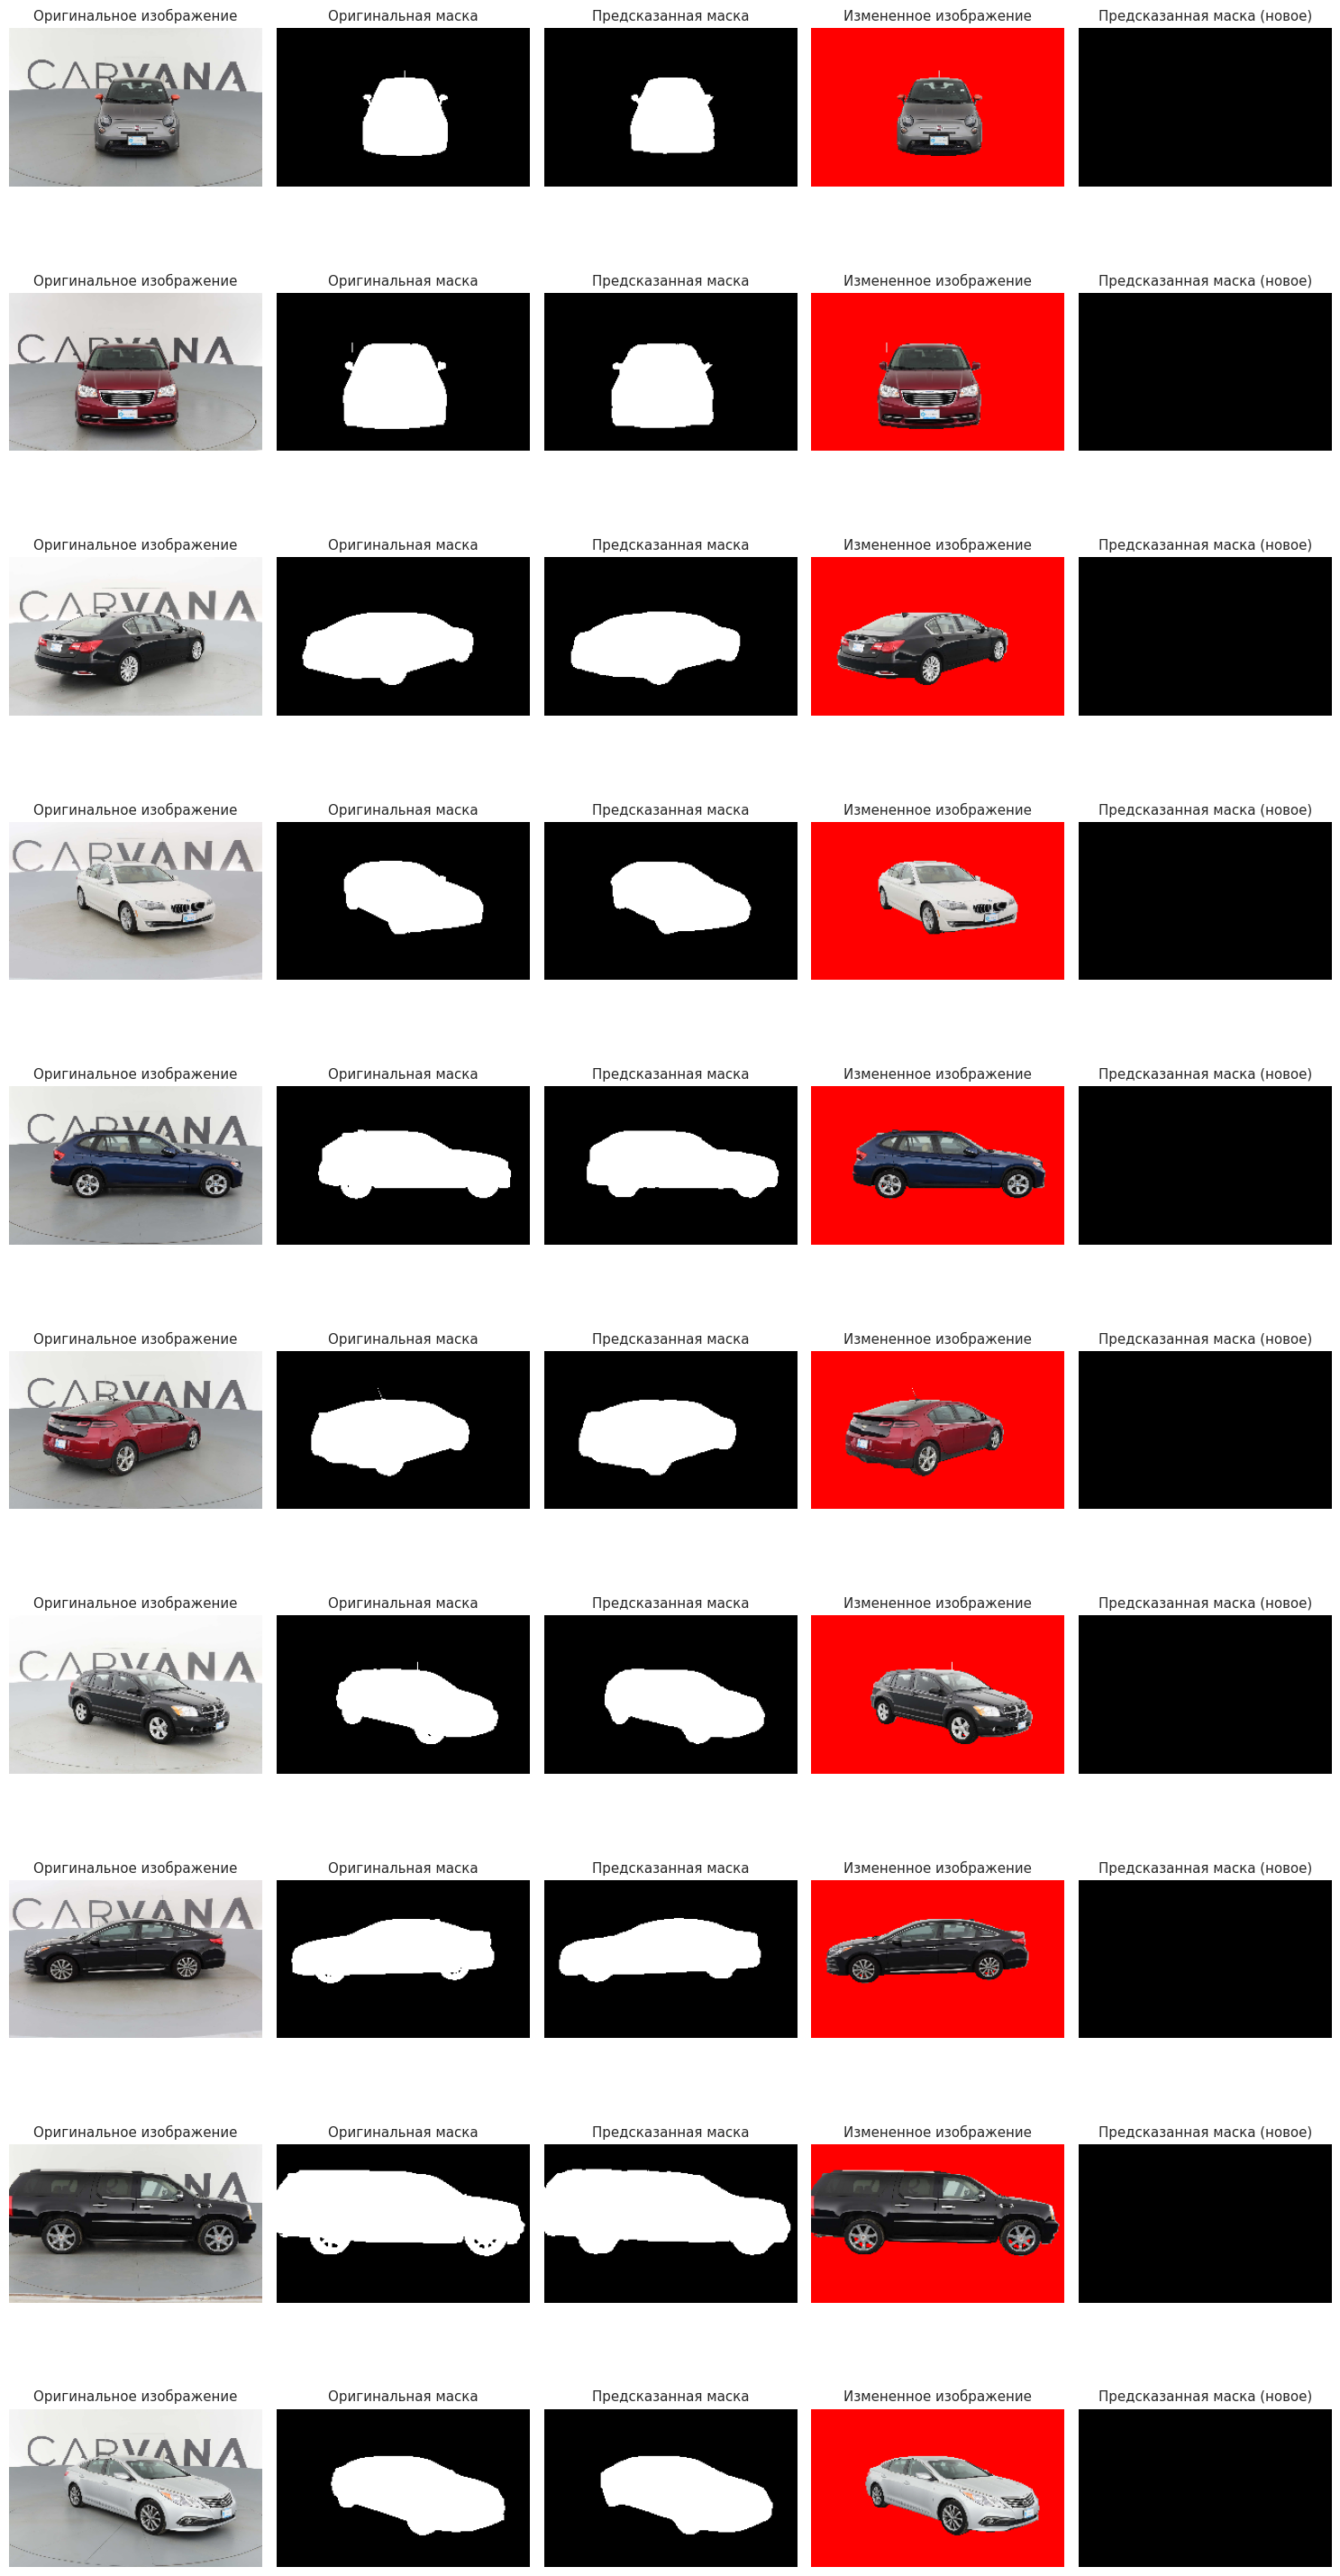

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from sklearn.metrics import jaccard_score

model.eval()

# 1. Выбор 10 изображений из валидационного датасета
indices = random.sample(range(len(val_dataset)), 10)
selected_images = [val_dataset[i] for i in indices]

original_images = []
original_masks = []
predicted_masks = []

for img, mask in selected_images:
    original_images.append(img)
    original_masks.append(mask)

    # 2. Получение предсказанных масок
    with torch.no_grad():
        img_tensor = img.unsqueeze(0)  # Добавляем размерность батча
        pred_mask = model(img_tensor)
        pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()  # Преобразуем в numpy массив
        predicted_masks.append(pred_mask)

# 3. Вычисление IoU для оригинальных изображений
def calculate_iou(original_mask, predicted_mask):
    return jaccard_score(original_mask.flatten(), predicted_mask.flatten(), average='macro')

ious = []
for original_mask, predicted_mask in zip(original_masks, predicted_masks):
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    ious.append(iou)

print("IoU для оригинальных изображений:", ious)

# 4. Изменение фона изображений
def change_background(image, mask, new_color=(255, 0, 0)):
    image_np = image.numpy().transpose(1, 2, 0)  # Преобразуем в HWC формат
    background = np.full(image_np.shape, new_color, dtype=np.uint8)
    new_image = np.where(mask.numpy()[:, :, np.newaxis] == 1, image_np, background)
    return new_image

new_images = [change_background(img, mask) for img, mask in zip(original_images, original_masks)]

# 5. Повторное вычисление IoU для новых изображений
new_predicted_masks = []

for img in new_images:
    with torch.no_grad():
        img_tensor = transforms.ToTensor()(img).unsqueeze(0)  # Преобразуем обратно в тензор
        pred_mask = model(img_tensor)
        pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()
        new_predicted_masks.append(pred_mask)

new_ious = []
for original_mask, predicted_mask in zip(original_masks, new_predicted_masks):
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    new_ious.append(iou)

print("IoU для измененных изображений:", new_ious)

# 6. Визуализация изображений
def visualize(images, masks, preds, new_images, new_preds):
    fig, axes = plt.subplots(len(images), 5, figsize=(15, len(images)*3))
    for i in range(len(images)):
        axes[i, 0].imshow(images[i].permute(1, 2, 0))
        axes[i, 0].set_title('Оригинальное изображение')
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title('Оригинальная маска')
        axes[i, 2].imshow(preds[i], cmap='gray')
        axes[i, 2].set_title('Предсказанная маска')
        axes[i, 3].imshow(new_images[i])
        axes[i, 3].set_title('Измененное изображение')
        axes[i, 4].imshow(new_preds[i], cmap='gray')
        axes[i, 4].set_title('Предсказанная маска (новое)')

        for ax in axes[i]:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize(original_images, original_masks, predicted_masks, new_images, new_predicted_masks)

Ответьте на вопрос, модель научилась сегментировать машины или фон?

**Ответ:** Фон, потому что при замене фона модель теряется и не предсказывает саму машину, тут нам специально дали датасет с примерно одинаковым фоном, для нашего переобучения под фон, чтобы мы обратили внимание на эту проблему

**Вывод:**

### Задача 2. Сравнение лоссов сегментации
Будем работать с датасетом [CityScapes](https://www.cityscapes-dataset.com/). Этот датасет состоит из кадров съемки автомобиля, движущегося по улицам  Германии. Проверим, насколько хорошо с ним справляются предобученные модели со структурой, отличной от U-Net. Скачайте [архив](https://disk.yandex.ru/d/J8gPv_bEiK-_QQ) с данными с диска. В папках `images` и `masks` лежат изображения и маски автомобилей соответственно.


In [24]:
images_directory = '/kaggle/input/citysc/cityscapes/images'
masks_directory = '/kaggle/input/citysc/cityscapes/masks'

images_filenames = list(sorted(os.listdir(images_directory)))
correct_images_filenames = [
    i for i in images_filenames
    if cv2.imread(os.path.join(images_directory, i)) is not None
]

# Делим случайным образом датасет
# на тренировочную, валидационную и тестовую части
random.seed(42)
random.shuffle(correct_images_filenames)

train_images_filenames = correct_images_filenames[:220]
val_images_filenames = correct_images_filenames[220:]

print(len(train_images_filenames), len(val_images_filenames))

220 80


Определите датасет для CityScapes и даталоадеры.

In [25]:
def preprocess_mask1(mask):
    '''Относит границу к животному'''
    mask = mask.astype(np.float32)
    mask[(mask != 1.0)] = 0.0
    mask[(mask == 1.0)] = 1.0
    return mask

In [26]:
class OxfordPetDataset(Dataset):
    def __init__(self, images_filenames, images_directory, masks_directory,  transform=None):
        '''Задаем аугментации и пути к картинкам и маскам'''
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.masks_directory = masks_directory
        self.transform = transform

    def __len__(self):
        return len(self.images_filenames)

    # @lru_cache(maxsize=None)
    def _get_image_mask(self, image_filename):
        '''Получим картинку и маску для файла image_filename'''
        # Считываем изображение
        image = cv2.imread(os.path.join(self.images_directory, image_filename))
        # Упорядочиваем каналы в правильном порядке
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Считываем маску
        with Image.open(os.path.join(self.masks_directory, image_filename[:-4] + '_mask.png')) as img:
            img = img.convert('L')
            numpy_array = np.array(img)
        mask = numpy_array.astype('bool').astype('int')
        mask = preprocess_mask1(mask)
        return image, mask

    def __getitem__(self, idx):
        '''Получим картинку и маску индекса idx'''
        image_filename = self.images_filenames[idx]
        image, mask = self._get_image_mask(image_filename)

        # Применяем трансформацию (аугментацию), если это необходимо
        if self.transform is not None:
            transformed = self.transform(image=image, mask=mask)
            image = transformed["image"]
            mask = transformed["mask"]

        return image, mask

In [27]:
train_transform = A.Compose(
    [
        A.Resize(256, 256),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.GaussNoise(),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ]
)
val_transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])
train_dataset = OxfordPetDataset(train_images_filenames, images_directory, masks_directory, transform=train_transform)
val_dataset = OxfordPetDataset(val_images_filenames, images_directory, masks_directory, transform=val_transform)

In [28]:
batch_size = 16
num_workers = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=True)

Определите класс модуля lightning для обучения модели сегментации машин. В качестве модели используйте предобученную `fcn_resnet50` или `deeplabv3_resnet50` из `torchvision.models.segmentation` на ваш выбор. Особенностью их использования является то, что модели дают на выходе маски для 21 класса (как в COCO) в поле `out` (см. примеры в семинаре). В остальном модели не отличаются от тех, что мы использовали ранее.

Наша цель - сравнить работу 3 лоссов - Binary Cross Entropy, Dice Loss, Tversky Loss. Реализацию двух последних можно взять из библиотеки [monai](https://docs.monai.io/en/stable/losses.html).

В качестве метрики используйте IoU.

In [29]:
class SegmentationModel(pl.LightningModule):
    def __init__(self, lr=1e-3):
        '''Инициализация модели'''
        super().__init__()
        self.lr = lr
        self.criterion = nn.BCEWithLogitsLoss()
        self.save_hyperparameters()

        self.model = models.segmentation.fcn_resnet50(weights='DEFAULT')

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)


    def forward_all_classes(self, x):
        '''Предсказание для всех 21 каналов'''
        return self.model(x.float())['out'] # (BS, 21, H, W)

    def forward(self, x):
        '''Предсказание только для канала собаки'''
        output = self.forward_all_classes(x) # (BS, H, W)
        # print(output.shape)
        # print(output)
        return output[:, 7]

    def __step(self, batch):
        '''Возвращает лосс и предсказания с 1 шага обучения по батчу'''
        images, target = batch
        output = self.forward(images)
        # output = output[:, 1].float()
        # print(output.shape)
        loss = self.criterion(output, target.float())
        return loss, output, target
    
    def calculate_iou(self, preds, targets, threshold=0.5):
        '''Вычисляет IoU для бинарной сегментации'''
        preds = (preds > threshold).float()  # Применяем порог для бинаризации
        intersection = (preds * targets).sum()
        union = preds.sum() + targets.sum() - intersection
        iou = intersection / (union + 1e-6)  # Добавляем малое значение для избежания деления на ноль
        return iou
    
    def training_step(self, batch, batch_idx):
        loss, preds, targets = self.__step(batch)
        iou = self.calculate_iou(preds, targets)
        
        # Логируем метрики
        self.log('train_loss', loss)
        self.log('train_iou', iou)
        
        return {'loss': loss}
    
    
    def validation_step(self, batch, batch_idx):
        with torch.no_grad():  # Отключаем вычисление градиентов
            loss, preds, targets = self.__step(batch)
            iou = self.calculate_iou(preds, targets)
    
            # Логируем метрики
            self.log('val_loss', loss)
            self.log('val_iou', iou)
    
        return {'val_loss': loss}


#### Визуализация до обучения

До обучения визуализируйте несколько предсказаний модели на тестовой части CityScapes. Покажите исходную картинку, предсказание модели и истинную маску. Не забудьте брать предсказания только по каналу машин.

In [43]:
model = SegmentationModel()
checkpoint_callback = pl.callbacks.ModelCheckpoint()
wandb_logger = WandbLogger(project='Losses', log_model='all')

IoU для оригинальных изображений: [0.36881256103515625, 0.48001861572265625, 0.49634552001953125, 0.49282073974609375, 0.49350738525390625, 0.41442108154296875, 1.0, 0.4580230712890625, 0.43170166015625, 1.0]


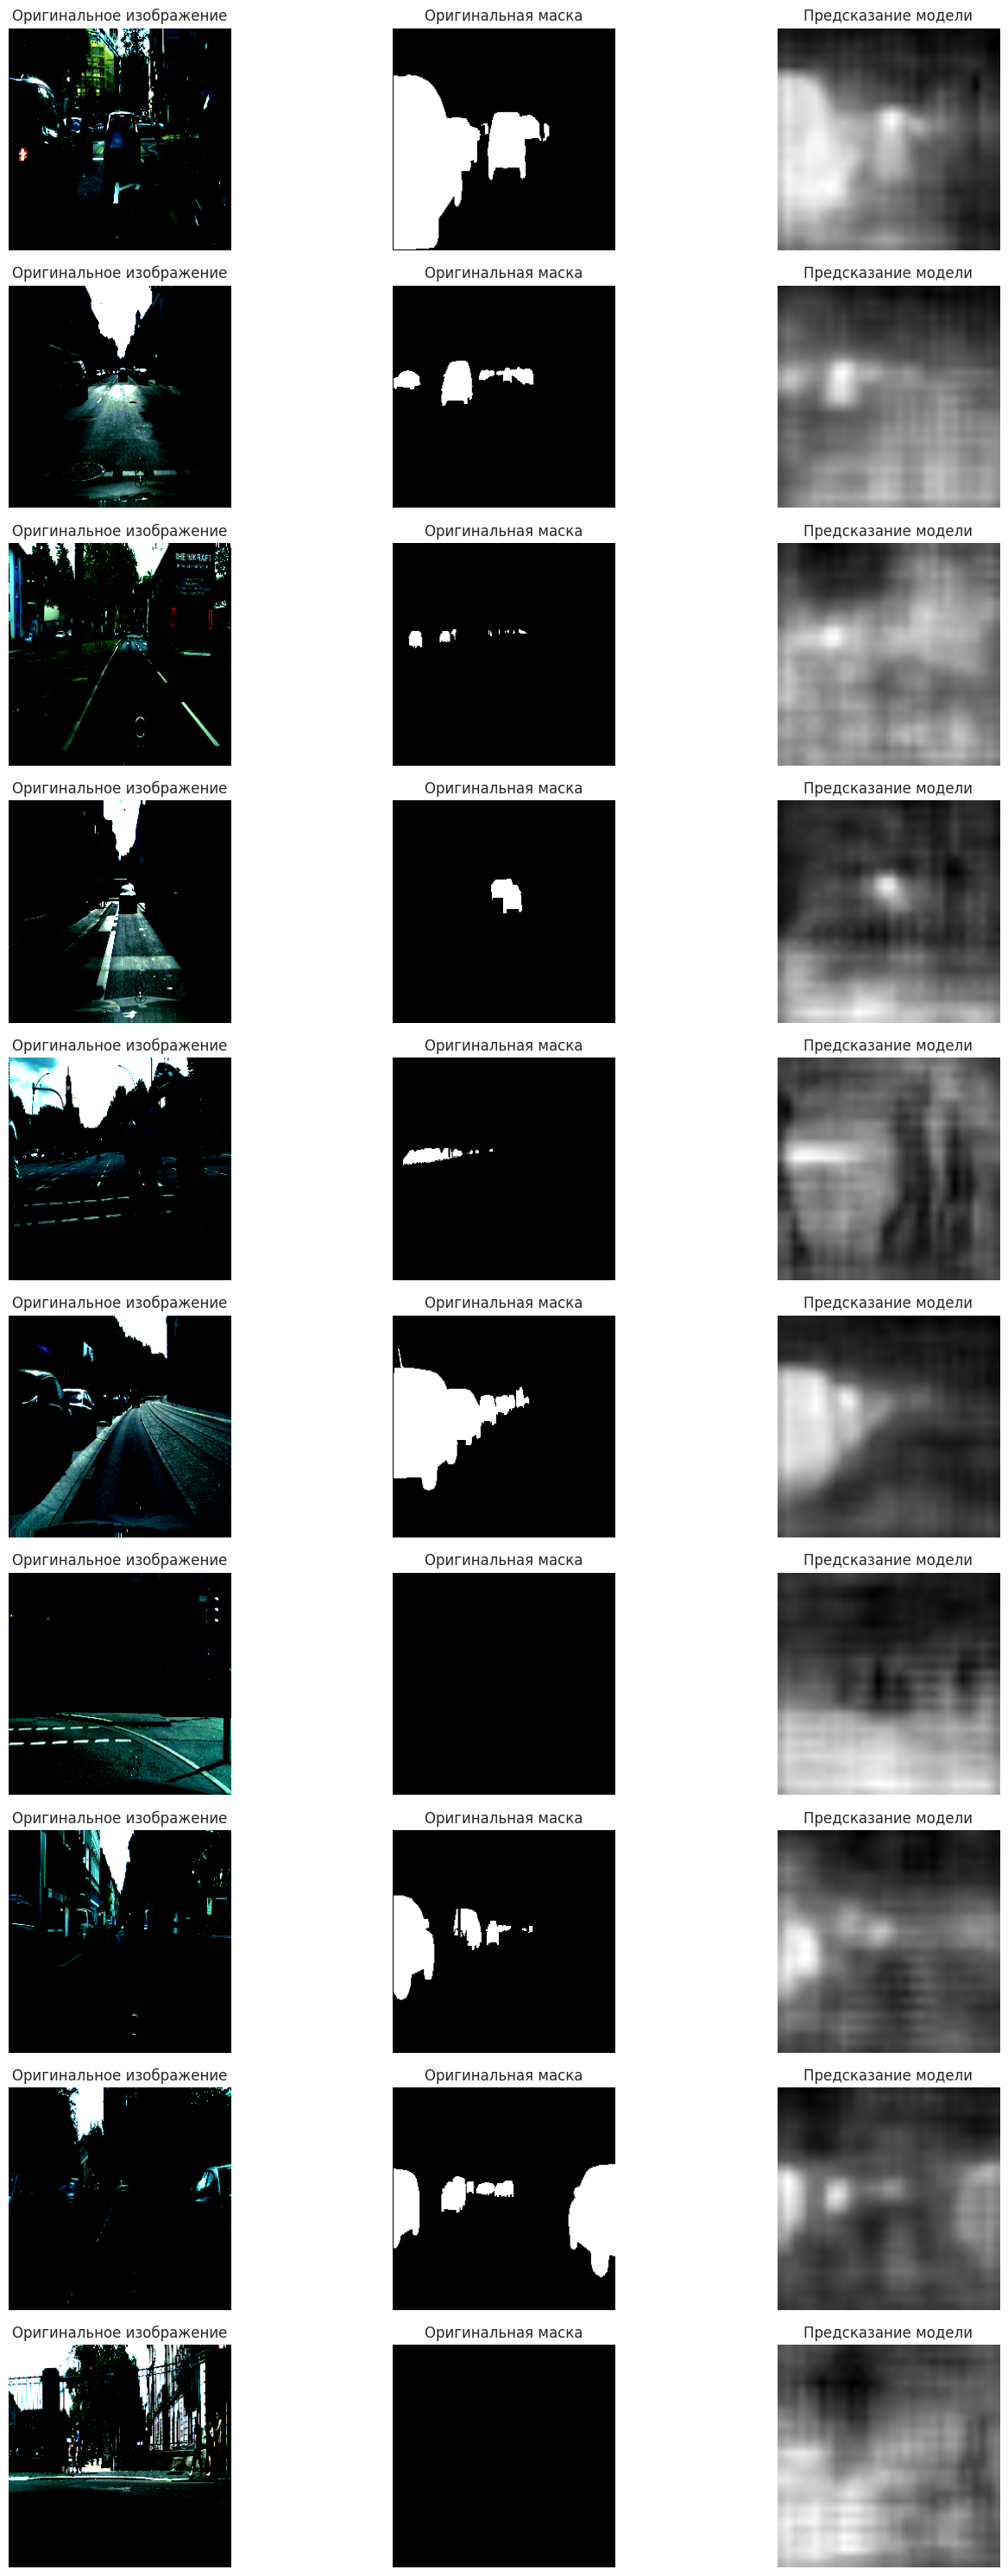

In [44]:
model.eval()

# 1. Выбор 10 изображений из валидационного датасета
indices = random.sample(range(len(val_dataset)), 10)
selected_images = [val_dataset[i] for i in indices]

original_images = []
original_masks = []
predicted_masks = []

for img, mask in selected_images:
    original_images.append(img)
    original_masks.append(mask)

    # 2. Получение предсказанных масок
    with torch.no_grad():
        img_tensor = img.unsqueeze(0)  # Добавляем размерность батча
        pred_mask = (model(img_tensor).cpu().numpy())
        # pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()  # Преобразуем в numpy массив
        
        predicted_masks.append(pred_mask)

# 3. Вычисление IoU для оригинальных изображений
def calculate_iou(original_mask, predicted_mask):
    # print(original_mask.shape, predicted_mask.shape)
    return jaccard_score(original_mask.flatten(), predicted_mask.flatten(), average='macro')

ious = []
for original_mask, predicted_mask in zip(original_masks, predicted_masks):
    predicted_mask = preprocess_mask1(predicted_mask)
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    ious.append(iou)

print("IoU для оригинальных изображений:", ious)

# 4. Изменение фона изображений
def change_background(image, mask, new_color=(255, 0, 0)):
    image_np = image.numpy().transpose(1, 2, 0)  # Преобразуем в HWC формат
    background = np.full(image_np.shape, new_color, dtype=np.uint8)
    new_image = np.where(mask.numpy()[:, :, np.newaxis] == 1, image_np, background)
    return new_image

new_images = [change_background(img, mask) for img, mask in zip(original_images, original_masks)]
# 6. Визуализация изображений
def visualize(images, masks, preds, new_images, new_preds):
    fig, axes = plt.subplots(len(images), 3, figsize=(15, len(images)*3))
    for i in range(len(images)):
        axes[i, 0].imshow(images[i].permute(1, 2, 0))
        axes[i, 0].set_title('Оригинальное изображение')
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title('Оригинальная маска')
        axes[i, 2].imshow(preds[i][0], cmap='gray')
        axes[i, 2].set_title('Предсказание модели')

        for ax in axes[i]:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize(original_images, original_masks, predicted_masks, new_images, predicted_masks)

Видно, что предобученная модель выдает карту вероятностей, где вырисовывается уже правильный ответ

#### Binary Cross Entropy

Обучите предобученную модель, используя BCE Loss. Сравните несколько предсказаний с истинными масками на тестовой выборке. Также после обучения (до завершения wandb run) выведите IoU на тесте с помощью `trainer.validate`.

In [45]:
model = SegmentationModel()
checkpoint_callback = pl.callbacks.ModelCheckpoint()
wandb_logger = WandbLogger(project='losses', log_model='all')
trainer = pl.Trainer(logger=wandb_logger,
                     max_epochs=8,
                     accelerator="gpu",
                     callbacks=[checkpoint_callback])
trainer.fit(model, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (14) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IoU для оригинальных изображений: [0.49634552001953125, 0.48551177978515625, 0.49675750732421875, 0.47057342529296875, 0.49820709228515625, 0.4861602783203125, 0.499908447265625, 0.452117919921875, 0.49004364013671875, 0.4991455078125]


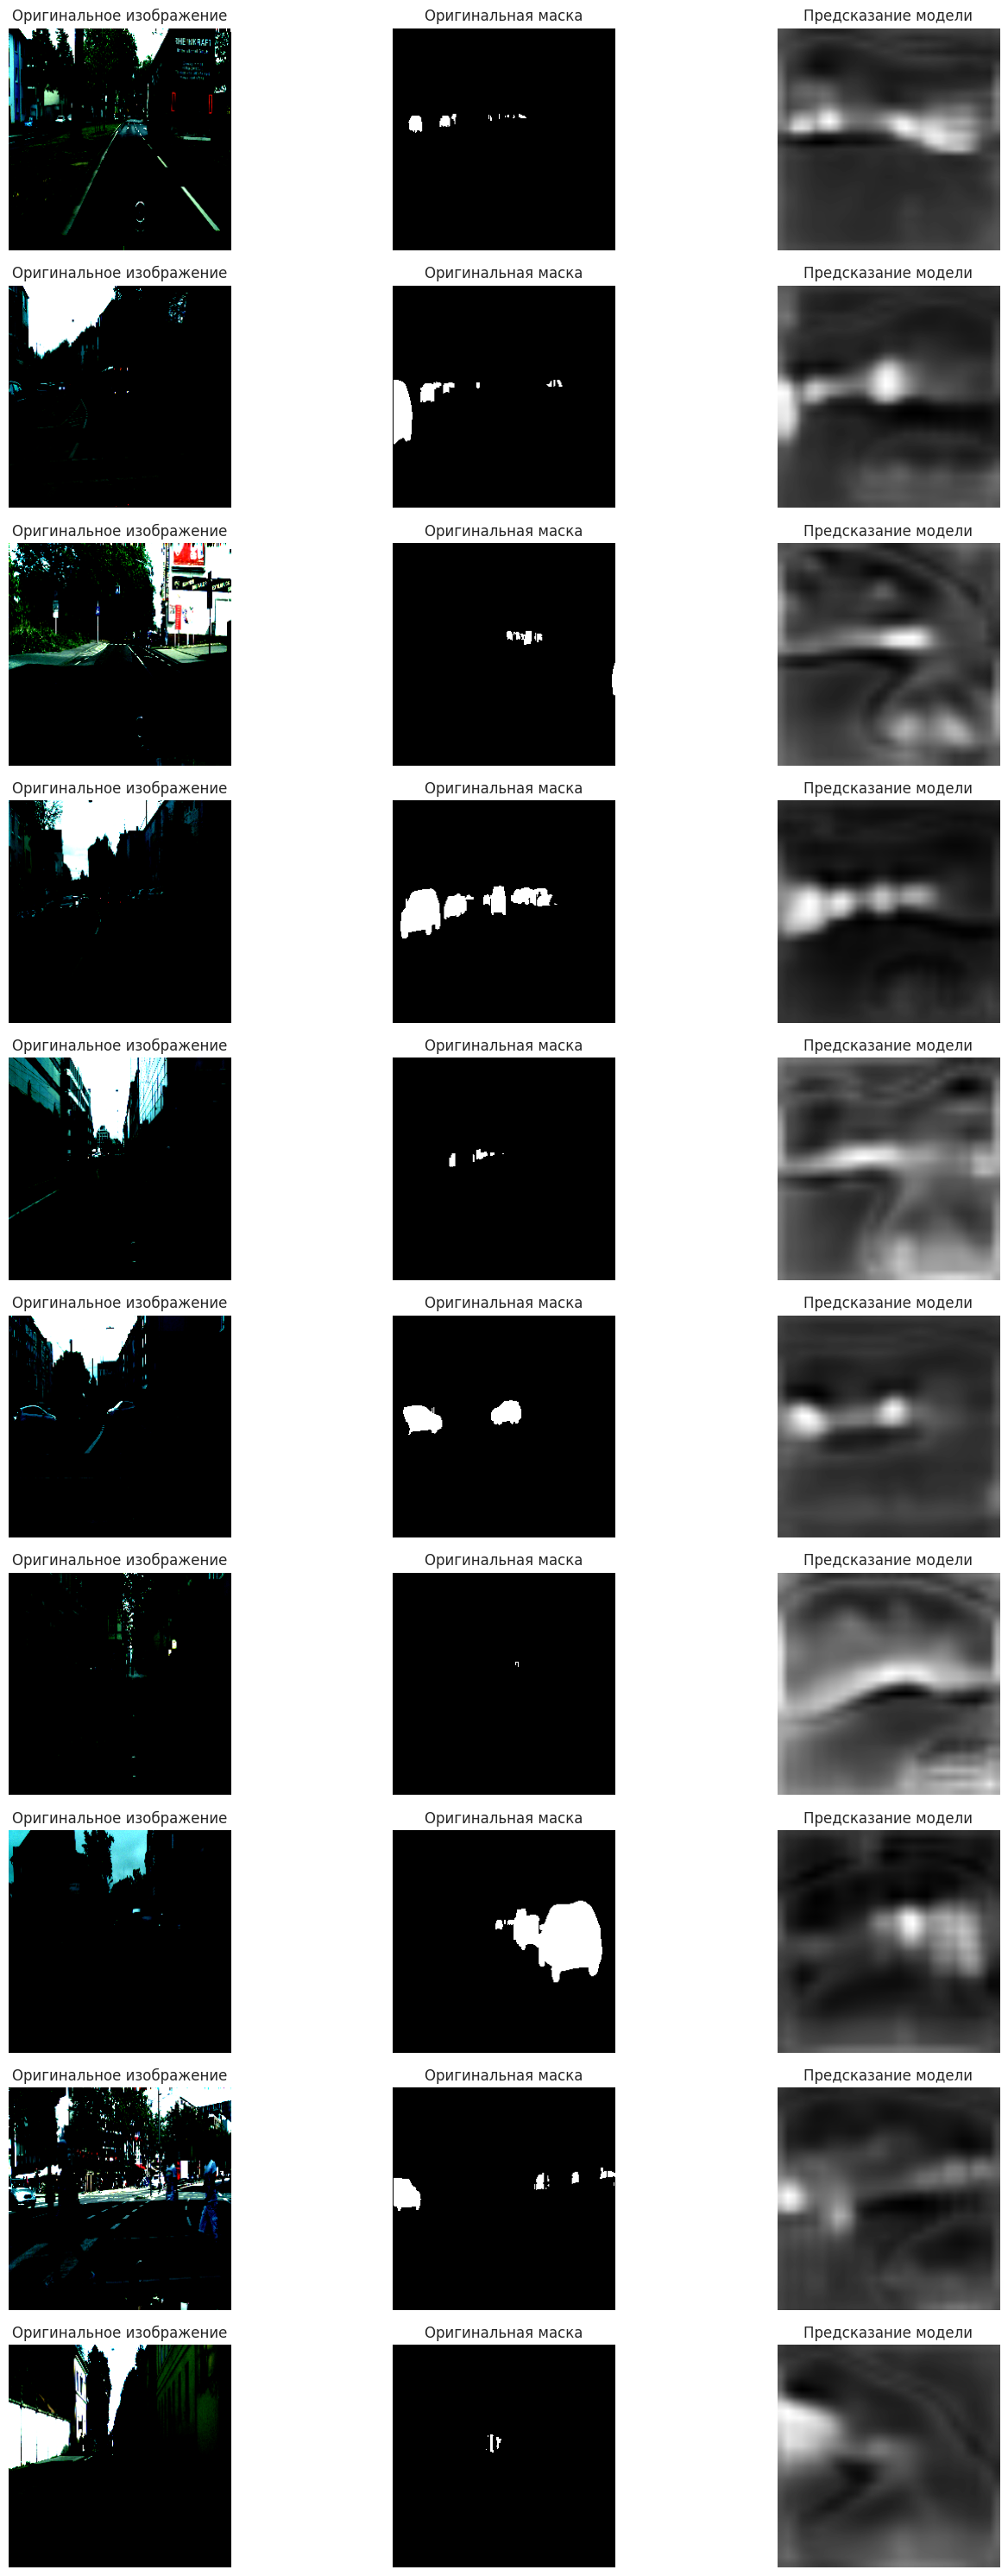

In [46]:
model.eval()

# 1. Выбор 10 изображений из валидационного датасета
indices = random.sample(range(len(val_dataset)), 10)
selected_images = [val_dataset[i] for i in indices]

original_images = []
original_masks = []
predicted_masks = []

for img, mask in selected_images:
    original_images.append(img)
    original_masks.append(mask)

    # 2. Получение предсказанных масок
    with torch.no_grad():
        img_tensor = img.unsqueeze(0)  # Добавляем размерность батча
        pred_mask = (model(img_tensor).cpu().numpy())
        # pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()  # Преобразуем в numpy массив
        
        predicted_masks.append(pred_mask)

# 3. Вычисление IoU для оригинальных изображений
def calculate_iou(original_mask, predicted_mask):
    # print(original_mask.shape, predicted_mask.shape)
    return jaccard_score(original_mask.flatten(), predicted_mask.flatten(), average='macro')

ious = []
for original_mask, predicted_mask in zip(original_masks, predicted_masks):
    predicted_mask = preprocess_mask1(predicted_mask)
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    ious.append(iou)

print("IoU для оригинальных изображений:", ious)

# 4. Изменение фона изображений
def change_background(image, mask, new_color=(255, 0, 0)):
    image_np = image.numpy().transpose(1, 2, 0)  # Преобразуем в HWC формат
    background = np.full(image_np.shape, new_color, dtype=np.uint8)
    new_image = np.where(mask.numpy()[:, :, np.newaxis] == 1, image_np, background)
    return new_image

new_images = [change_background(img, mask) for img, mask in zip(original_images, original_masks)]
# 6. Визуализация изображений
def visualize(images, masks, preds, new_images, new_preds):
    fig, axes = plt.subplots(len(images), 3, figsize=(15, len(images)*3))
    for i in range(len(images)):
        axes[i, 0].imshow(images[i].permute(1, 2, 0))
        axes[i, 0].set_title('Оригинальное изображение')
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title('Оригинальная маска')
        axes[i, 2].imshow(preds[i][0], cmap='gray')
        axes[i, 2].set_title('Предсказание модели')

        for ax in axes[i]:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize(original_images, original_masks, predicted_masks, new_images, predicted_masks)

In [47]:
trainer.validate(dataloaders=val_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_iou          │     0.575824499130249     │
│         val_loss          │    0.07153842598199844    │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.07153842598199844, 'val_iou': 0.575824499130249}]

In [49]:
wandb.finish()

После дообучения на функции ошибок BCE силуеты стали вырисовываться еще лучше

#### Dice Loss

Сделайте то же самое для Dice Loss.

In [30]:
!pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.0 MB/s eta 0:00:00a 0:00:01


In [31]:
from monai.losses import DiceLoss

class SegmentationModel(pl.LightningModule):
    def __init__(self, lr=1e-3):
        '''Инициализация модели'''
        super().__init__()
        self.lr = lr
        # self.criterion = nn.BCEWithLogitsLoss()
        self.criterion = DiceLoss(to_onehot_y=False, softmax=True)
        self.save_hyperparameters()

        self.model = models.segmentation.fcn_resnet50(weights='DEFAULT')

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)


    def forward_all_classes(self, x):
        '''Предсказание для всех 21 каналов'''
        return self.model(x.float())['out'] # (BS, 21, H, W)

    def forward(self, x):
        '''Предсказание только для канала собаки'''
        output = self.forward_all_classes(x)[:, 7] # (BS, H, W)
        # print(output.shape)
        # print(output)
        return output

    def __step(self, batch):
        '''Возвращает лосс и предсказания с 1 шага обучения по батчу'''
        images, target = batch
        output = self.forward(images)
        # output = output[:, 1].float()
        # print(output.shape)
        loss = self.criterion(output, target.float())
        return loss, output, target
    
    def calculate_iou(self, preds, targets, threshold=0.5):
        '''Вычисляет IoU для бинарной сегментации'''
        preds = (preds > threshold).float()  # Применяем порог для бинаризации
        intersection = (preds * targets).sum()
        union = preds.sum() + targets.sum() - intersection
        iou = intersection / (union + 1e-6)  # Добавляем малое значение для избежания деления на ноль
        return iou
    
    def training_step(self, batch, batch_idx):
        loss, preds, targets = self.__step(batch)
        iou = self.calculate_iou(preds, targets)
        
        # Логируем метрики
        self.log('train_loss', loss)
        self.log('train_iou', iou)
        
        return {'loss': loss}
    
    
    def validation_step(self, batch, batch_idx):
        with torch.no_grad():  # Отключаем вычисление градиентов
            loss, preds, targets = self.__step(batch)
            iou = self.calculate_iou(preds, targets)
    
            # Логируем метрики
            self.log('val_loss', loss)
            self.log('val_iou', iou)
    
        return {'val_loss': loss}


In [32]:
model = SegmentationModel()
checkpoint_callback = pl.callbacks.ModelCheckpoint()
wandb_logger = WandbLogger(project='losses', log_model='all')
trainer = pl.Trainer(logger=wandb_logger,
                     max_epochs=8,
                     accelerator="gpu",
                     callbacks=[checkpoint_callback])
trainer.fit(model, train_loader, val_loader)

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 84.8MB/s] 
wandb: Currently logged in as: leonard88dranoel (leonard88dranoel-iitp). Use `wandb login --relogin` to force relogin


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (14) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IoU для оригинальных изображений: [0.4923553466796875, 0.49814605712890625, 0.49634552001953125, 0.43300628662109375, 0.49282073974609375, 0.47186279296875, 0.41608428955078125, 0.4910125732421875, 0.49675750732421875, 0.46358489990234375]


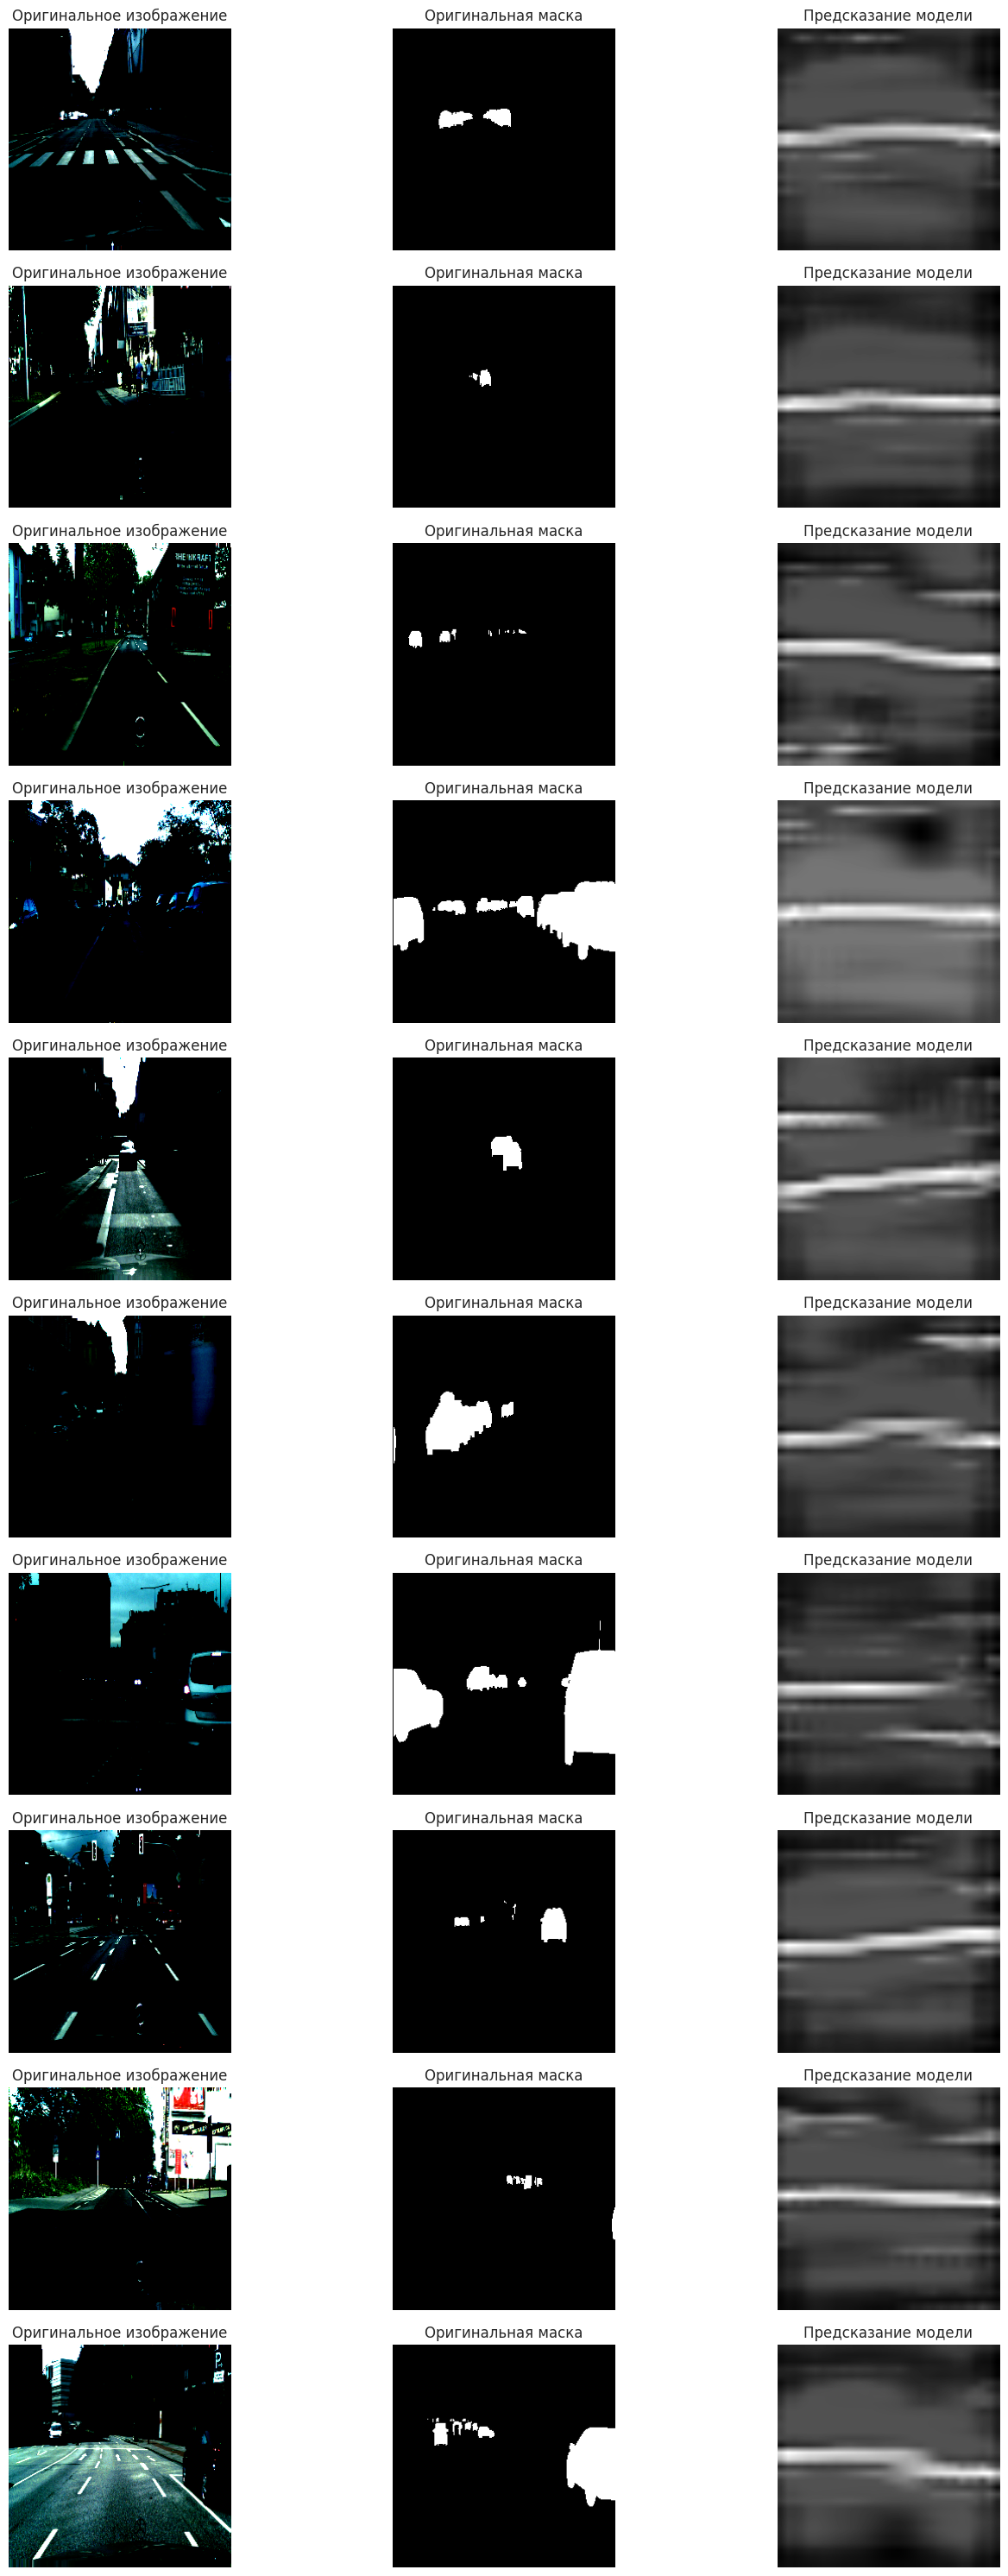

In [42]:
model.eval()

# 1. Выбор 10 изображений из валидационного датасета
indices = random.sample(range(len(val_dataset)), 10)
selected_images = [val_dataset[i] for i in indices]

original_images = []
original_masks = []
predicted_masks = []

for img, mask in selected_images:
    original_images.append(img)
    original_masks.append(mask)

    # 2. Получение предсказанных масок
    with torch.no_grad():
        img_tensor = img.unsqueeze(0)  # Добавляем размерность батча
        pred_mask = (model(img_tensor).cpu().numpy())
        # pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()  # Преобразуем в numpy массив
        
        predicted_masks.append(pred_mask)

# 3. Вычисление IoU для оригинальных изображений
def calculate_iou(original_mask, predicted_mask):
    # print(original_mask.shape, predicted_mask.shape)
    return jaccard_score(original_mask.flatten(), predicted_mask.flatten(), average='macro')

def preprocess_mask1(mask):
    '''Относит границу к животному'''
    mask = mask.astype(np.float32)
    mask[(mask != 2.0)] = 0.0
    mask[(mask == 2.0)] = 1.0
    return mask

ious = []
for original_mask, predicted_mask in zip(original_masks, predicted_masks):
    predicted_mask = preprocess_mask1(predicted_mask)
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    ious.append(iou)

print("IoU для оригинальных изображений:", ious)

# 4. Изменение фона изображений
def change_background(image, mask, new_color=(255, 0, 0)):
    image_np = image.numpy().transpose(1, 2, 0)  # Преобразуем в HWC формат
    background = np.full(image_np.shape, new_color, dtype=np.uint8)
    new_image = np.where(mask.numpy()[:, :, np.newaxis] == 1, image_np, background)
    return new_image

new_images = [change_background(img, mask) for img, mask in zip(original_images, original_masks)]
# 6. Визуализация изображений
def visualize(images, masks, preds, new_images, new_preds):
    fig, axes = plt.subplots(len(images), 3, figsize=(15, len(images)*3))
    for i in range(len(images)):
        axes[i, 0].imshow(images[i].permute(1, 2, 0))
        axes[i, 0].set_title('Оригинальное изображение')
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title('Оригинальная маска')
        axes[i, 2].imshow(preds[i][0], cmap='gray')
        axes[i, 2].set_title('Предсказание модели')

        for ax in axes[i]:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize(original_images, original_masks, predicted_masks, new_images, predicted_masks)

Очень странные предсказания

In [40]:
trainer.validate(dataloaders=val_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_iou          │    0.09992393851280212    │
│         val_loss          │    0.3242143988609314     │
└───────────────────────────┴───────────────────────────┘

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[{'val_loss': 0.3242143988609314, 'val_iou': 0.09992393851280212}]

In [43]:
wandb.finish()

Судя по визуализации, чего больше у модели - False Negative или False Positive предсказаний?

Замечаем, что предсказания испортились.
По визуализации у модели больше False Positive значений следовательно попробуем сместись в Tversky Loss в сторону важности FP

#### Tversky Loss

Tversky Index является обобщением Dice Index для произвольных весов при FP и FN:

$$T_{\alpha, \beta} (y, \hat{y}) = \frac{\text{TP}}{\text{TP} + \alpha \ \text{FP} + \beta \ \text{FN}}$$

При этом $T_{\frac{1}{2}, \frac{1}{2}}$ соответсвует Dice Index; а $T_{1, 1} - $ Jaccard index (IoU).

Исходя из выводов про FN и FP подберите параметры $\alpha, \beta$ у Tversky Loss для модели. Обучите ее с таким лоссом. Улучшилась ли метрика? Как изменились предсказания визуально?

In [50]:
from monai.losses import TverskyLoss

class SegmentationModel(pl.LightningModule):
    def __init__(self, lr=1e-3):
        '''Инициализация модели'''
        super().__init__()
        self.lr = lr
        # self.criterion = nn.BCEWithLogitsLoss()
        self.criterion = TverskyLoss(alpha=0.8, beta=0.2, softmax=True)
        self.save_hyperparameters()

        self.model = models.segmentation.fcn_resnet50(weights='DEFAULT')

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)


    def forward_all_classes(self, x):
        '''Предсказание для всех 21 каналов'''
        return self.model(x.float())['out'] # (BS, 21, H, W)

    def forward(self, x):
        '''Предсказание только для канала собаки'''
        output = self.forward_all_classes(x)[:, 7] # (BS, H, W)
        # print(output.shape)
        # print(output)
        return output

    def __step(self, batch):
        '''Возвращает лосс и предсказания с 1 шага обучения по батчу'''
        images, target = batch
        output = self.forward(images)
        # output = output[:, 1].float()
        # print(output.shape)
        loss = self.criterion(output, target.float())
        return loss, output, target
    
    def calculate_iou(self, preds, targets, threshold=0.5):
        '''Вычисляет IoU для бинарной сегментации'''
        preds = (preds > threshold).float()  # Применяем порог для бинаризации
        intersection = (preds * targets).sum()
        union = preds.sum() + targets.sum() - intersection
        iou = intersection / (union + 1e-6)  # Добавляем малое значение для избежания деления на ноль
        return iou
    
    def training_step(self, batch, batch_idx):
        loss, preds, targets = self.__step(batch)
        iou = self.calculate_iou(preds, targets)
        
        # Логируем метрики
        self.log('train_loss', loss)
        self.log('train_iou', iou)
        
        return {'loss': loss}
    
    
    def validation_step(self, batch, batch_idx):
        with torch.no_grad():  # Отключаем вычисление градиентов
            loss, preds, targets = self.__step(batch)
            iou = self.calculate_iou(preds, targets)
    
            # Логируем метрики
            self.log('val_loss', loss)
            self.log('val_iou', iou)
    
        return {'val_loss': loss}


In [51]:
model = SegmentationModel()
checkpoint_callback = pl.callbacks.ModelCheckpoint()
wandb_logger = WandbLogger(project='losses', log_model='all')
trainer = pl.Trainer(logger=wandb_logger,
                     max_epochs=8,
                     accelerator="gpu",
                     callbacks=[checkpoint_callback])
trainer.fit(model, train_loader, val_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory ./losses/m6r1nkvw/checkpoints exists and is not empty.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IoU для оригинальных изображений: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


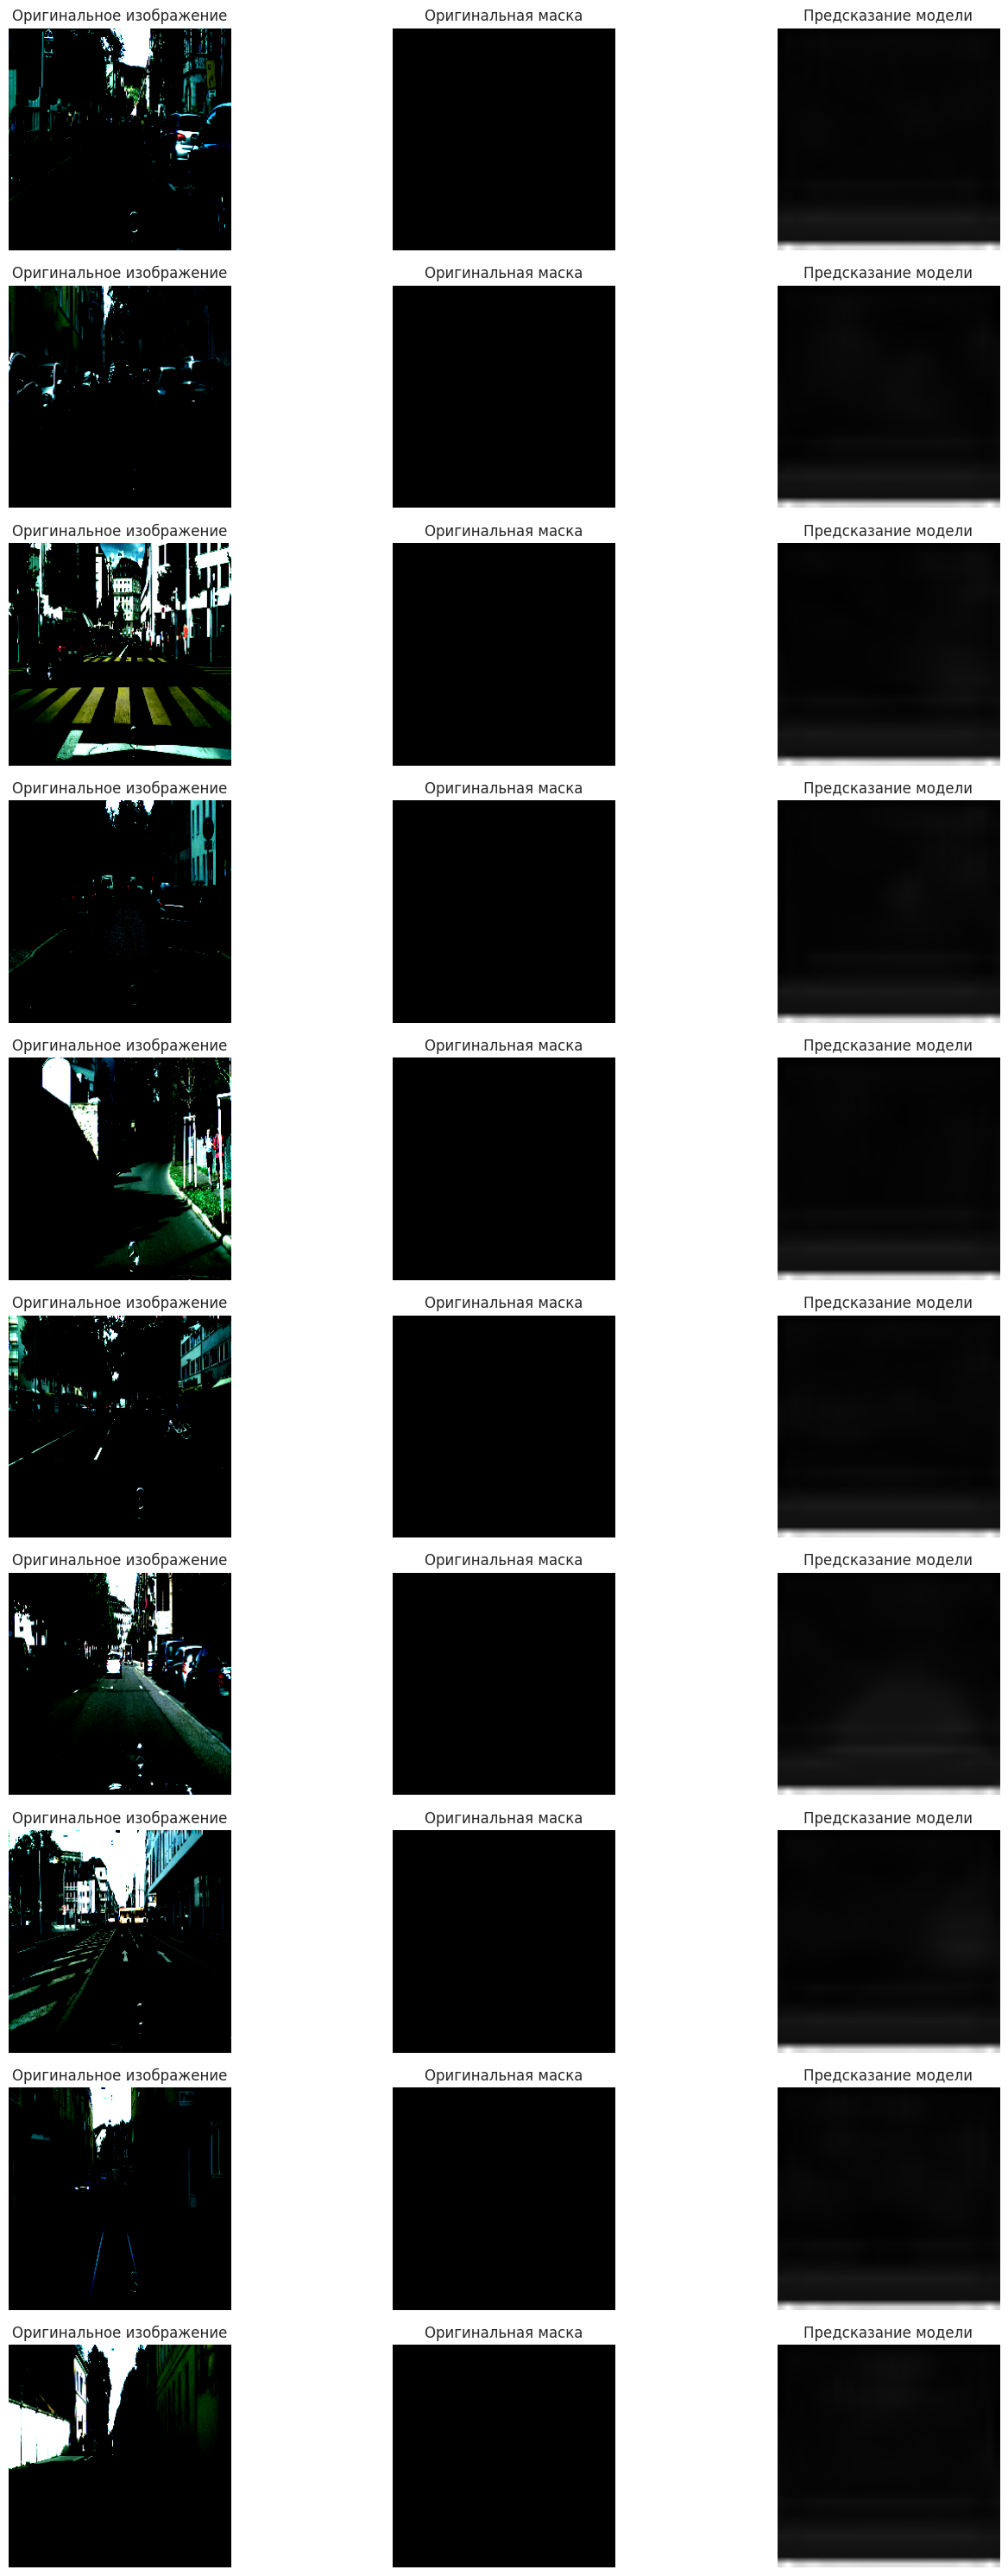

In [57]:
model.eval()

# 1. Выбор 10 изображений из валидационного датасета
indices = random.sample(range(len(val_dataset)), 10)
selected_images = [val_dataset[i] for i in indices]

original_images = []
original_masks = []
predicted_masks = []

for img, mask in selected_images:
    original_images.append(img)
    original_masks.append(mask)

    # 2. Получение предсказанных масок
    with torch.no_grad():
        img_tensor = img.unsqueeze(0)  # Добавляем размерность батча
        pred_mask = (model(img_tensor).cpu().numpy())
        # pred_mask = torch.argmax(pred_mask, dim=1).squeeze().cpu().numpy()  # Преобразуем в numpy массив
        
        predicted_masks.append(pred_mask)

# 3. Вычисление IoU для оригинальных изображений
def calculate_iou(original_mask, predicted_mask):
    # print(original_mask.shape, predicted_mask.shape)
    return jaccard_score(original_mask.flatten(), predicted_mask.flatten(), average='macro')

def preprocess_mask1(mask):
    '''Относит границу к животному'''
    mask = mask.astype(np.float32)
    mask[(mask != 1.0)] = 0.0
    mask[(mask == 1.0)] = 1.0
    return mask

ious = []
for original_mask, predicted_mask in zip(original_masks, predicted_masks):
    predicted_mask = preprocess_mask1(predicted_mask)
    iou = calculate_iou(original_mask.numpy(), predicted_mask)
    ious.append(iou)

print("IoU для оригинальных изображений:", ious)

# 4. Изменение фона изображений
def change_background(image, mask, new_color=(255, 0, 0)):
    image_np = image.numpy().transpose(1, 2, 0)  # Преобразуем в HWC формат
    background = np.full(image_np.shape, new_color, dtype=np.uint8)
    new_image = np.where(mask.numpy()[:, :, np.newaxis] == 1, image_np, background)
    return new_image

new_images = [change_background(img, mask) for img, mask in zip(original_images, original_masks)]
# 6. Визуализация изображений
def visualize(images, masks, preds, new_images, new_preds):
    fig, axes = plt.subplots(len(images), 3, figsize=(15, len(images)*3))
    for i in range(len(images)):
        axes[i, 0].imshow(images[i].permute(1, 2, 0))
        axes[i, 0].set_title('Оригинальное изображение')
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title('Оригинальная маска')
        axes[i, 2].imshow(preds[i][0], cmap='gray')
        axes[i, 2].set_title('Предсказание модели')

        for ax in axes[i]:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize(original_images, original_masks, predicted_masks, new_images, predicted_masks)

In [54]:
trainer.validate(dataloaders=val_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_iou          │            0.0            │
│         val_loss          │   0.023750003427267075    │
└───────────────────────────┴───────────────────────────┘

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[{'val_loss': 0.023750003427267075, 'val_iou': 0.0}]

In [ ]:
wandb.finish()

**[!!!Тут результаты должны были получиться получше, чем в Dice, а в Dice получше чем в BCE, так как мы засунули IoU в лосс, однако ни первого ни второго не наблюдалось, что очень странно!!!]**

#### Визуализация логов обучения

Визуализируйте лосс и метрику на обучении и валидации на предыдущих запусках. Сравните и сделайте выводы, а также выводы по всей задаче.

**1.Carvana**

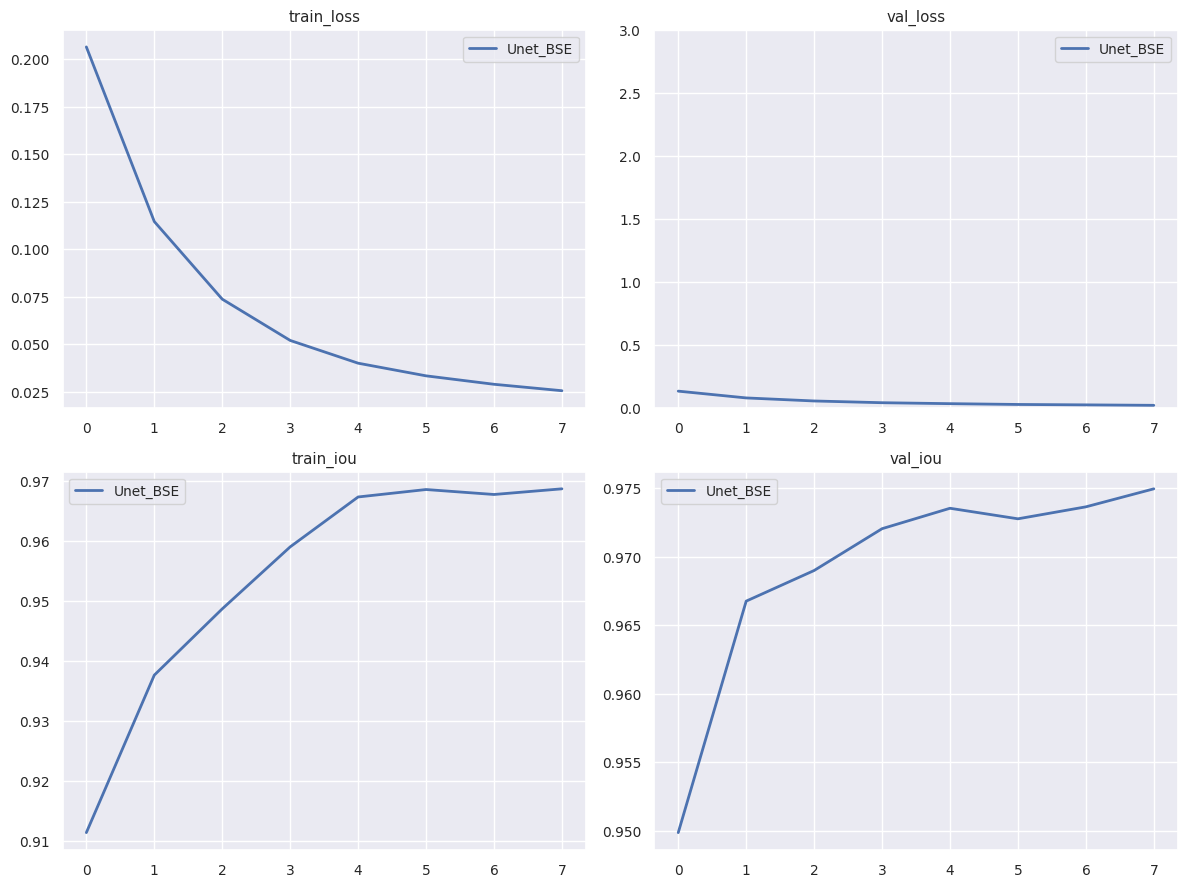

In [42]:
runs = wandb.Api().runs("Unet")
subplot_names = np.array([['train_loss', 'val_loss'],
                         ['train_iou', 'val_iou']])

fig, axs = plt.subplots(2, 2, figsize=(12, 9))
lw = 2
for i, run in enumerate(runs):
    df = run.history().groupby('epoch').mean(numeric_only=True)
    for k in range(2):
        for m in range(2):
            axs[k, m].set_title(subplot_names[k, m])
            axs[k, m].plot(df[subplot_names[k, m]], lw=lw, label=run.name)
            axs[k, m].legend()
    axs[0, 1].set_ylim((0, 3))
plt.tight_layout()

Видно, что предобученный Unet имеет довольно хорошее качество уже сразу, однако в ходе его дообучения удалось достичь еще лучших показателей метрики и лосса, также заметно что выход на 'плато' осуществляется за малое количество эпох (4 для метрики, 3 для лосса)

**2. CityScapes**

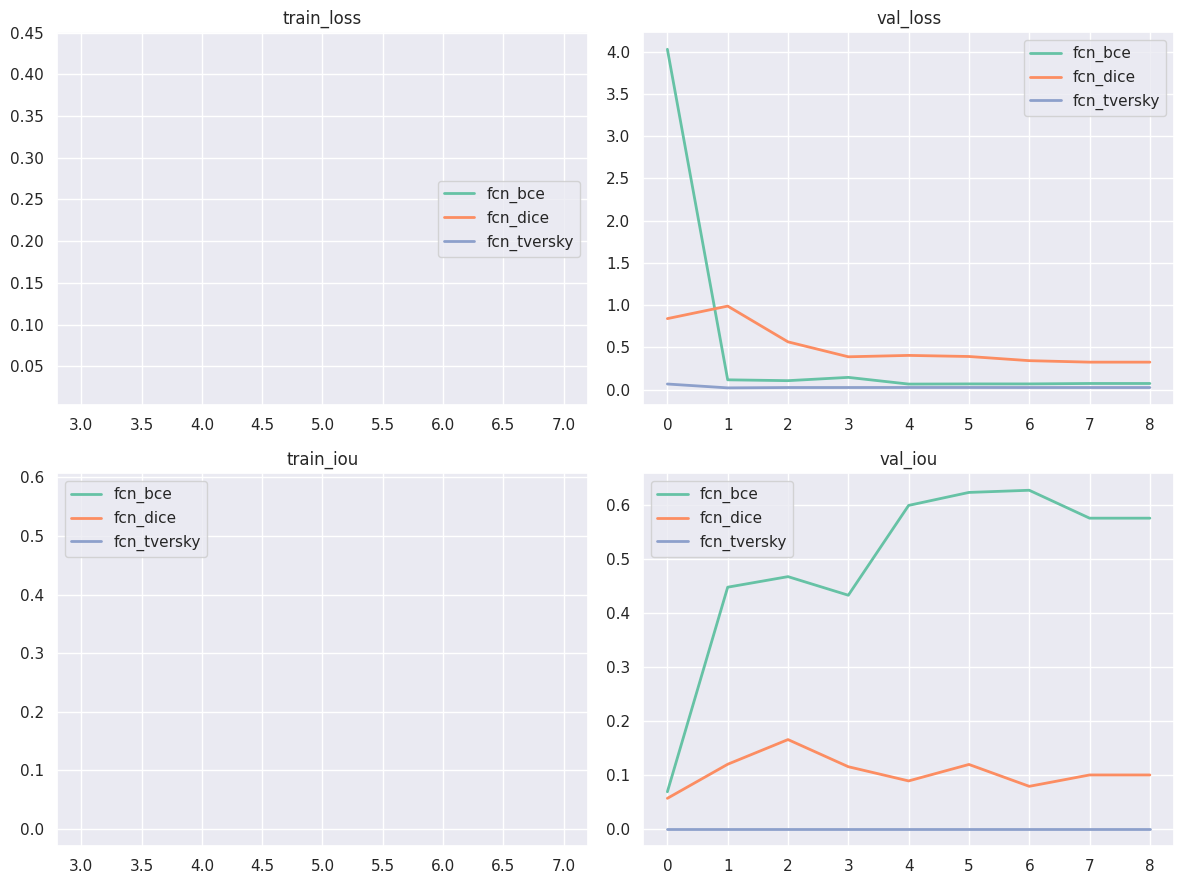

In [58]:
runs = wandb.Api().runs("losses")
subplot_names = np.array([['train_loss', 'val_loss'],
                         ['train_iou', 'val_iou']])

fig, axs = plt.subplots(2, 2, figsize=(12, 9))
lw = 2
for i, run in enumerate(runs):
    df = run.history().groupby('epoch').mean(numeric_only=True)
    for k in range(2):
        for m in range(2):
            axs[k, m].set_title(subplot_names[k, m])
            axs[k, m].plot(df[subplot_names[k, m]], lw=lw, label=run.name)
            axs[k, m].legend()
    # axs[0, 1].set_ylim((0, 3))
plt.tight_layout()

Почему-то не отображается график лосса на трейне, хотя на сайте wandb все есть.

Видно, что лучше всего себя показала функция BCE, но скорее всего, были какие-то проблемы с моей реализации fine-tuning-a fcn модели для задачи, так как dice лосс буквально максимизирует нашу метрику качества, а tversky-loss делает эврестический подход, который уже по данным с dice модели подбирает коэффециенты для еще лучшей сегментации изображений, таким образом ситуация должна была порлучиться ровно наоборот

**Выводы:**

* Сущетсвуют реализованные решения, для решения задач плотной классификации, например, pretrained unet показывает изначально хорошие результаты, которые можно зафайнтьюнить до еще лучших
* Следует обращать внимание на то, что регистрирует модель - как в случае с прошлым заданием когда модель определяла лягушку по траве, так и тут, модель может регистрировать все кроме автомобиля, так, нам был дан специальный датасет с примерно одинаковым фоном, чтобы обратить на это внимание
* Модели для задачи сегментации учаться намного дольше чем для задач классификации
* Лучше всего использовать специальные лосы, так, например, хорошей идеей будет сначала использовать модель с DiceLoss, а потом, по предсказаниям посмотреть, где модель больше всего ошибается и увеличить вес таких ошибок с помощью TverskyLoss